# [Lab Session 4](deconvolution.ipynb)

In [101]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

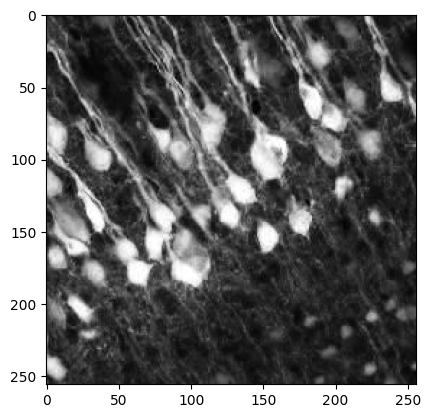

In [102]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [103]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

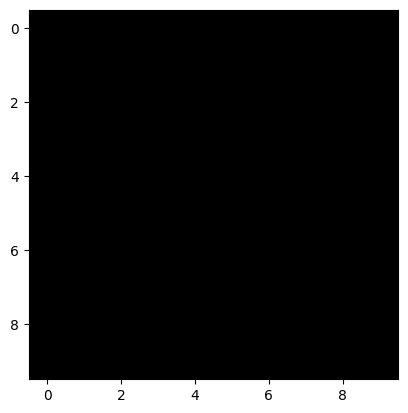

In [104]:
plt.imshow(np.zeros((10, 10)), "gray")

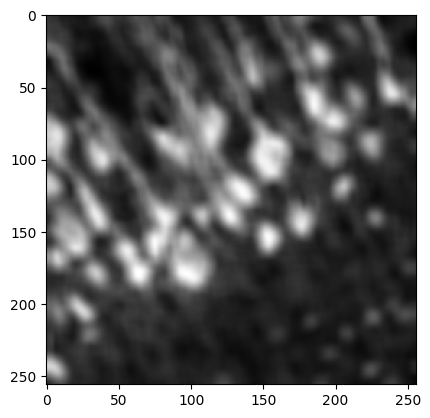

In [105]:
new_image = conv(img, psf, mode='same',boundary='symm')
plt.imshow(new_image, 'gray')

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

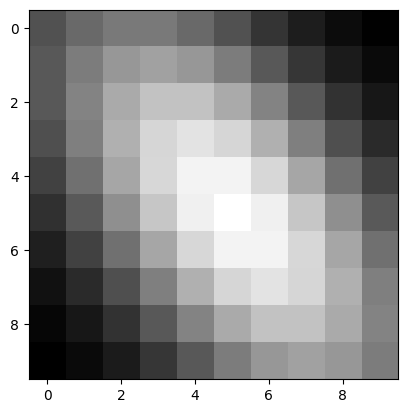

In [106]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray')

Apply the second psf to the image:

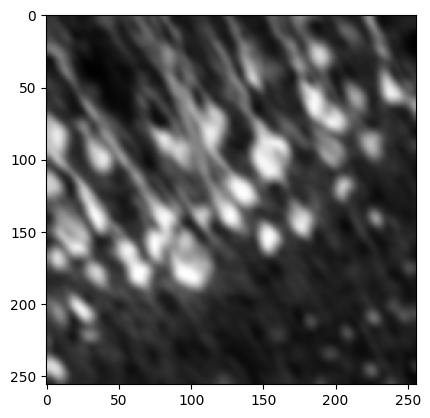

In [107]:
psf_new = create_psf(psf_size)

newer_image = conv(img, psf_new, mode='same',boundary='symm')
plt.imshow(newer_image, 'gray')

**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [108]:
P_star =np.flip(psf)

g = newer_image


def richardson_lucy_deconvolution(newer_image, psf, n_iterations):
    img_deconv = np.full(newer_image.shape, 0.5)
    P_star =np.flip(psf)
    h = img_deconv
    
    for x in range(n_iterations):
        t1 = conv(img_deconv,psf, mode ='same',boundary='symm')
        t1[t1==0] = 1e-12 # avoid divide by zero 
        ratio = g/ t1
        t3 = g/t1
        t3 = conv(ratio, P_star, mode = 'same',boundary='symm')
        h *=t3
        
        # return h
    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [109]:

restored = richardson_lucy_deconvolution(newer_image=new_image, psf=psf, n_iterations=60)

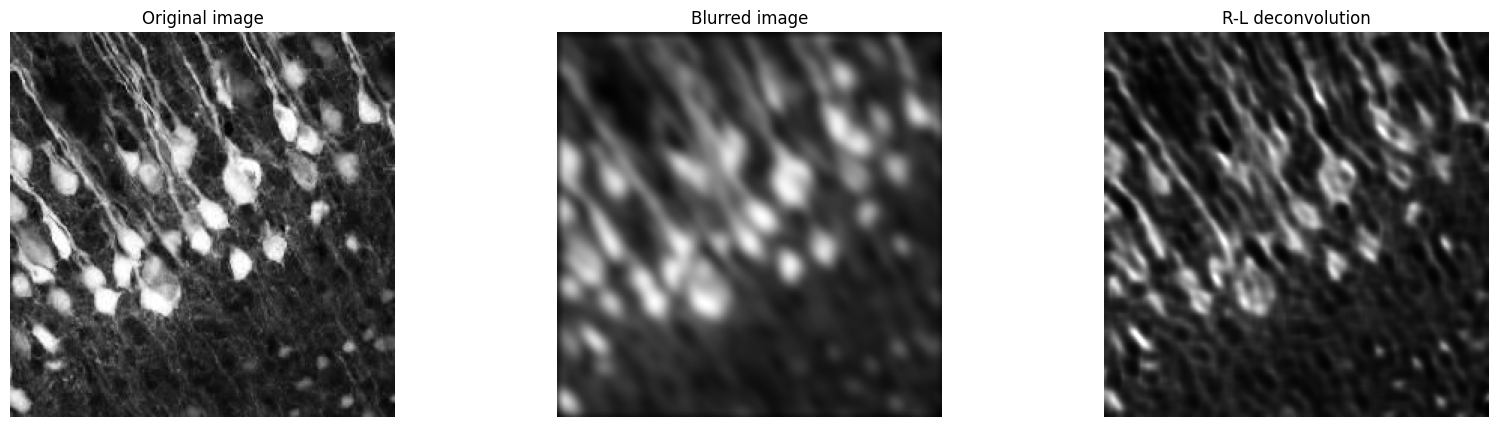

In [ ]:

restored = richardson_lucy_deconvolution(newer_image=new_image, psf=psf, n_iterations=60)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(blurred, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(restored, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [111]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor

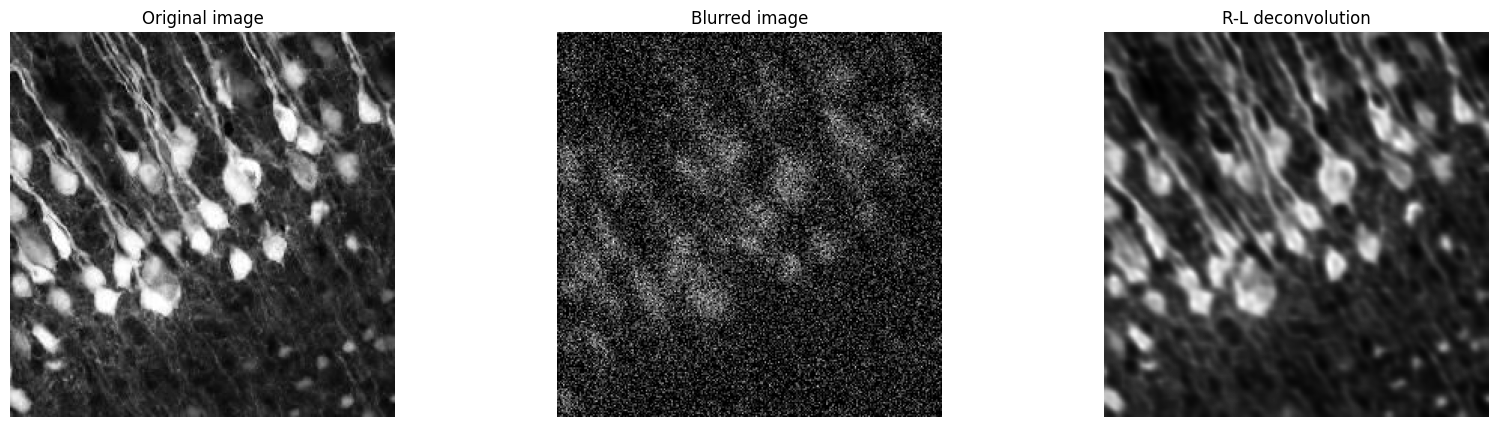

In [123]:
noise_img = blurred + noise
noise_img = noise_img.clip(0, 1)
noise_image = richardson_lucy_deconvolution(newer_image=noise_img, psf=psf_new, n_iterations=60)


plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(noise_img, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(noise_image, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

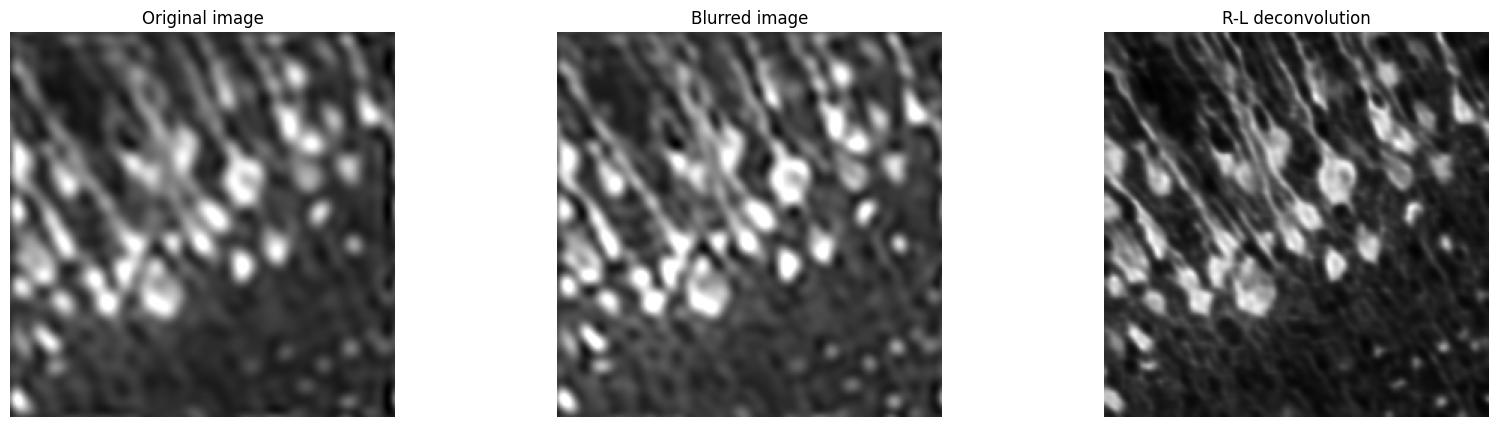

In [116]:
wiener_img = wiener(new_image, psf, balance=2, clip=True)
img_wiener =wiener(noise_image , psf_new, balance=2, clip=True)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(wiener_img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_wiener, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(noise_image, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

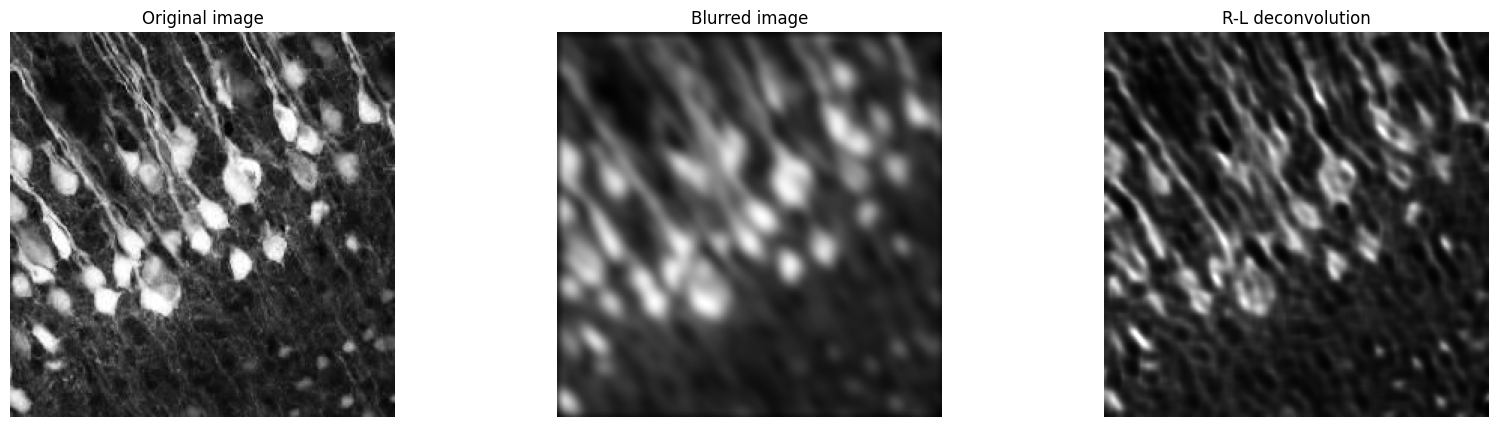

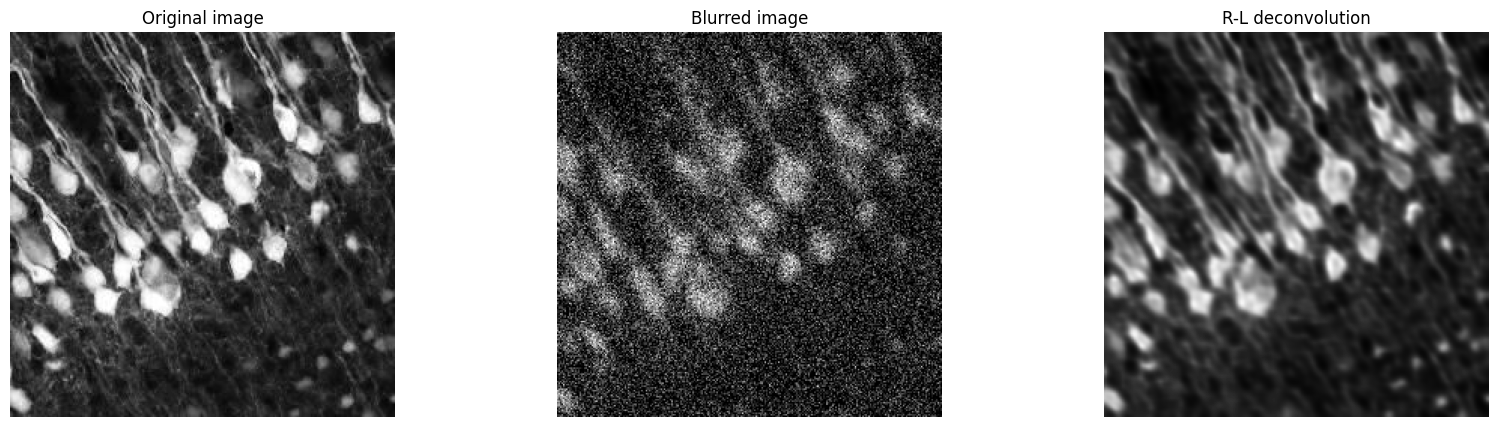

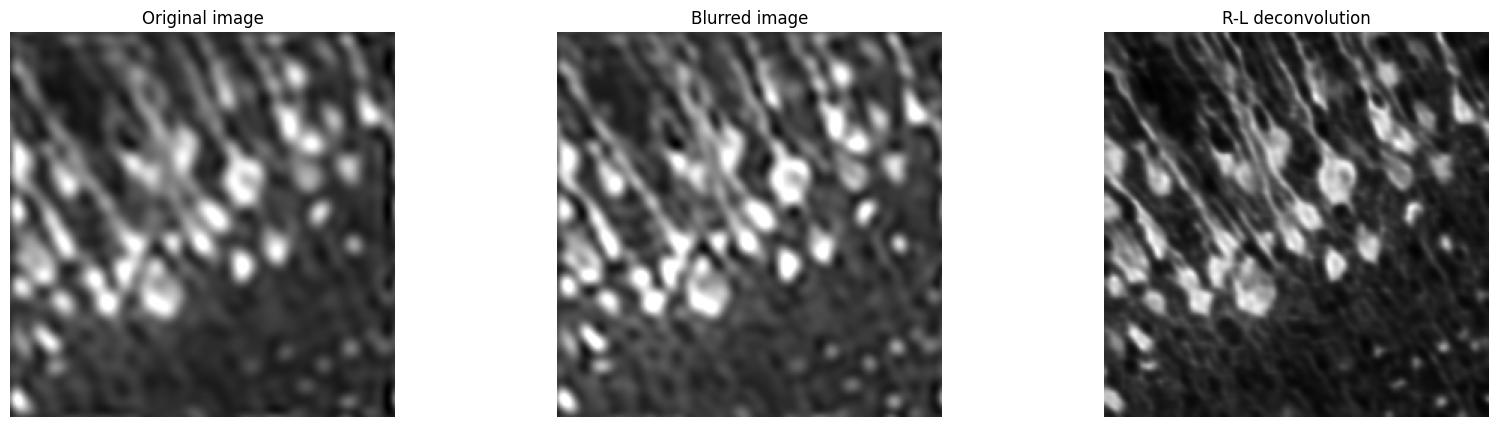

In [117]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

#4

restored = richardson_lucy_deconvolution(newer_image=new_image, psf=psf, n_iterations=60)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(blurred, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(restored, 'gray')
plt.title('R-L deconvolution')
plt.show()

#5
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(noise_img, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(noise_image, 'gray')
plt.title('R-L deconvolution')
plt.show()

#6
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(wiener_img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_wiener, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(noise_image, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 8.]()** Use a wrong PSF to restore the image

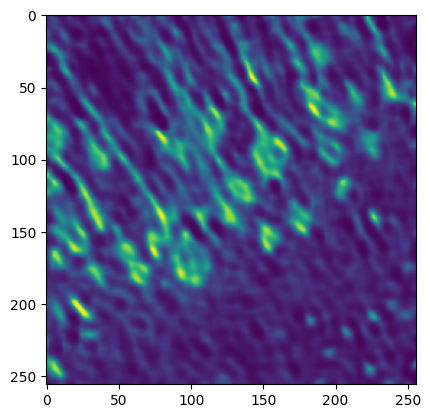

In [122]:
noise_image1 = richardson_lucy_deconvolution(newer_image=newer_image, psf=psf, n_iterations=60)
plt.imshow(noise_image1)